# Coursework 1

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the MLP2024_25_CW1_Spec.pdf (see Learn,  Assignment Submission, Coursework 1). The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. Before each experiment remember to re-initialize neural network weights and reset the data providers so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for num_epochs epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Error')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    ax_2.set_xlabel('Accuracy')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
import sys
sys.path.append('..')
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(NpzFile '/home/natmaw/Documents/ML_Practical/mlpractical_natmaws/data/emnist-train.npz' with keys: inputs, targets)
KeysView(NpzFile '/home/natmaw/Documents/ML_Practical/mlpractical_natmaws/data/emnist-valid.npz' with keys: inputs, targets)


In [ ]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

%pip install tqdm

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

# Setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

# Create model with ONE hidden layer
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

In [ ]:
# Create model with TWO hidden layers
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # first hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # second hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

In [5]:
# Define a function to train the model with varying hidden units and track statistics
def evaluate_varying_hidden_units(hidden_units_list, input_dim, output_dim, learning_rate, num_epochs, stats_interval, train_data, valid_data):
    results = {}
    
    for hidden_units in hidden_units_list:
        print(f"\nTraining model with {hidden_units} hidden units.")
        
        # Initialize weights and biases
        weights_init = GlorotUniformInit(rng=rng)
        biases_init = ConstantInit(0.)
        
        # Define model with the current number of hidden units
        model = MultipleLayerModel([
            AffineLayer(input_dim, hidden_units, weights_init, biases_init),  # Hidden layer
            ReluLayer(),
            AffineLayer(hidden_units, output_dim, weights_init, biases_init)  # Output layer
        ])
        
        # Set up the loss function (cross-entropy) and learning rule (Adam)
        error = CrossEntropySoftmaxError()
        learning_rule = AdamLearningRule(learning_rate=learning_rate)
        
        # Train the model and capture statistics
        stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
            model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=False)
        
        # Store the results for each number of hidden units
        results[hidden_units] = {
            "stats": stats,
            "keys": keys,
            "fig_1": fig_1,  # Error plot (training vs validation)
            "fig_2": fig_2,  # Accuracy plot (training vs validation)
        }
    
    return results

# Set hyperparameters
input_dim, output_dim = 784, 47  # Input: 784 (28x28 image), Output: 47 (EMNIST classes)
learning_rate = 0.001  # Adam learning rate
num_epochs = 100  # Number of training epochs
stats_interval = 1  # Interval to record stats
batch_size = 100  # Batch size for training and validation

# Define the list of hidden unit sizes to evaluate (32, 64, 128)
hidden_units_list = [32, 64, 128]

# Train and evaluate models with different hidden unit sizes
results = evaluate_varying_hidden_units(
    hidden_units_list, input_dim, output_dim, learning_rate, num_epochs, stats_interval, train_data, valid_data
)


Training model with 32 hidden units.


Ep Prog: 100%|██████████| 1000/1000 [00:01<00:00, 911.32it/s]
Epoch 1: 1.1s to complete
    error(train)=1.22e+00, acc(train)=6.60e-01, error(valid)=1.23e+00, acc(valid)=6.56e-01
Ep Prog: 100%|██████████| 1000/1000 [00:00<00:00, 1685.48it/s]
Epoch 2: 0.6s to complete
    error(train)=1.09e+00, acc(train)=6.89e-01, error(valid)=1.11e+00, acc(valid)=6.85e-01
Ep Prog: 100%|██████████| 1000/1000 [00:00<00:00, 1649.15it/s]
Epoch 3: 0.6s to complete
    error(train)=1.01e+00, acc(train)=7.14e-01, error(valid)=1.03e+00, acc(valid)=7.11e-01
Ep Prog: 100%|██████████| 1000/1000 [00:00<00:00, 1756.78it/s]
Epoch 4: 0.6s to complete
    error(train)=9.45e-01, acc(train)=7.28e-01, error(valid)=9.70e-01, acc(valid)=7.25e-01
Ep Prog: 100%|██████████| 1000/1000 [00:00<00:00, 1770.31it/s]
Epoch 5: 0.6s to complete
    error(train)=8.96e-01, acc(train)=7.40e-01, error(valid)=9.26e-01, acc(valid)=7.34e-01
Ep Prog: 100%|██████████| 1000/1000 [00:00<00:00, 1741.31it/s]
Epoch 6: 0.6s to complete
    error(tr


Training model with 64 hidden units.


Ep Prog: 100%|██████████| 1000/1000 [00:00<00:00, 1198.12it/s]
Epoch 1: 0.8s to complete
    error(train)=1.04e+00, acc(train)=7.03e-01, error(valid)=1.06e+00, acc(valid)=7.02e-01
Ep Prog: 100%|██████████| 1000/1000 [00:00<00:00, 1205.66it/s]
Epoch 2: 0.8s to complete
    error(train)=8.62e-01, acc(train)=7.49e-01, error(valid)=8.80e-01, acc(valid)=7.41e-01
Ep Prog: 100%|██████████| 1000/1000 [00:00<00:00, 1165.02it/s]
Epoch 3: 0.9s to complete
    error(train)=7.62e-01, acc(train)=7.72e-01, error(valid)=7.95e-01, acc(valid)=7.64e-01
Ep Prog: 100%|██████████| 1000/1000 [00:00<00:00, 1180.13it/s]
Epoch 4: 0.9s to complete
    error(train)=7.08e-01, acc(train)=7.88e-01, error(valid)=7.52e-01, acc(valid)=7.75e-01
Ep Prog: 100%|██████████| 1000/1000 [00:00<00:00, 1146.86it/s]
Epoch 5: 0.9s to complete
    error(train)=6.58e-01, acc(train)=8.02e-01, error(valid)=7.04e-01, acc(valid)=7.89e-01
Ep Prog: 100%|██████████| 1000/1000 [00:00<00:00, 1190.97it/s]
Epoch 6: 0.8s to complete
    error(t


Training model with 128 hidden units.


Ep Prog: 100%|██████████| 1000/1000 [00:01<00:00, 550.90it/s]
Epoch 1: 1.8s to complete
    error(train)=9.05e-01, acc(train)=7.39e-01, error(valid)=9.28e-01, acc(valid)=7.29e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 408.53it/s]
Epoch 2: 2.5s to complete
    error(train)=7.12e-01, acc(train)=7.89e-01, error(valid)=7.44e-01, acc(valid)=7.77e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 404.85it/s]
Epoch 3: 2.5s to complete
    error(train)=6.16e-01, acc(train)=8.08e-01, error(valid)=6.62e-01, acc(valid)=7.94e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 377.44it/s]
Epoch 4: 2.7s to complete
    error(train)=5.56e-01, acc(train)=8.26e-01, error(valid)=6.17e-01, acc(valid)=8.10e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 405.14it/s]
Epoch 5: 2.5s to complete
    error(train)=5.22e-01, acc(train)=8.33e-01, error(valid)=5.94e-01, acc(valid)=8.15e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 400.83it/s]
Epoch 6: 2.5s to complete
    error(train)=

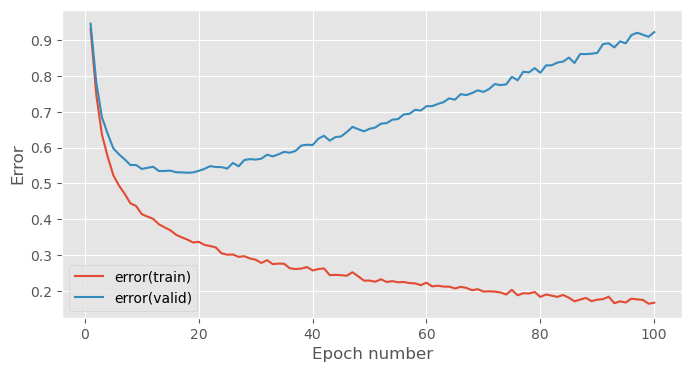

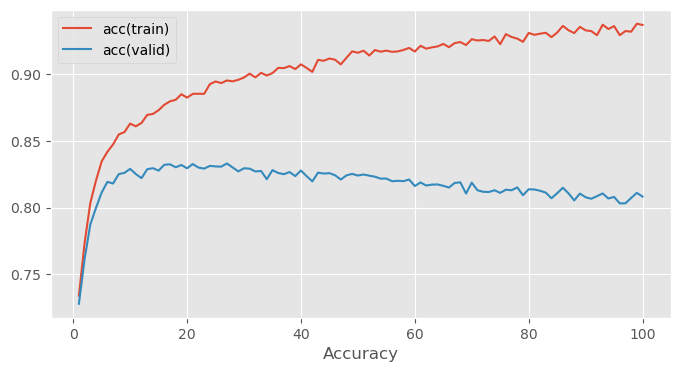

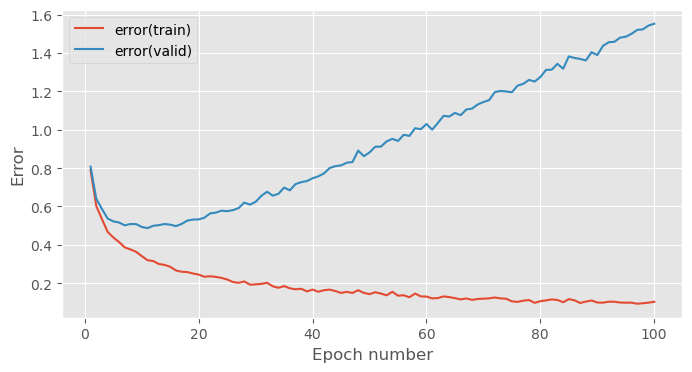

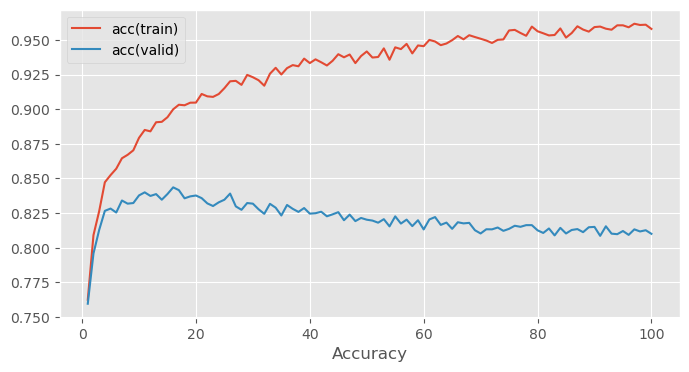

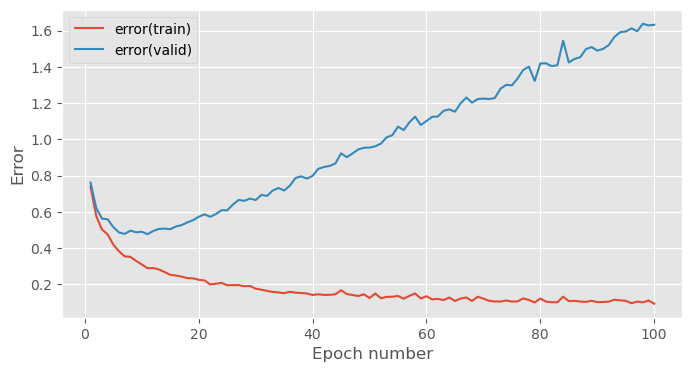

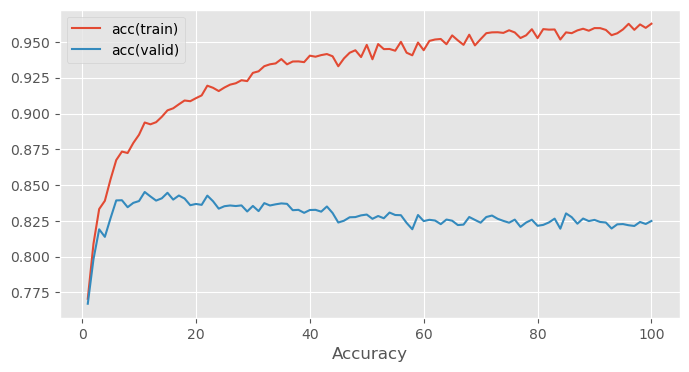

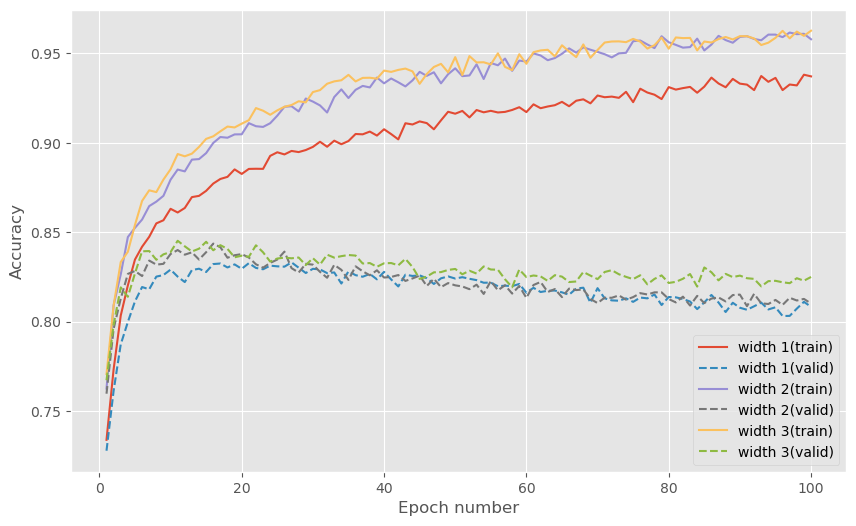

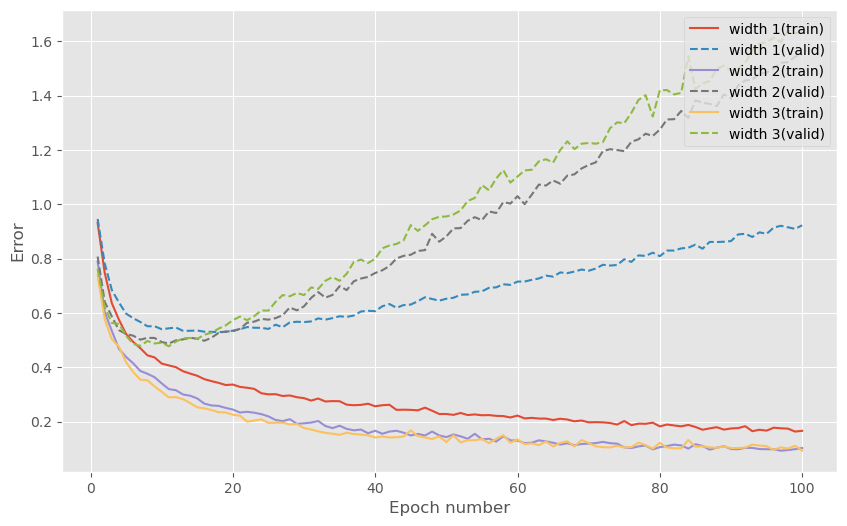

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_results(results, num_epochs, stats_interval):
    epochs = np.arange(1, num_epochs + 1, stats_interval)

    # Plot Accuracy (Training and Validation) for all hidden units configurations
    plt.figure(figsize=(10, 6))
    for hidden_units, res in results.items():
        stats = res['stats']
        keys = res['keys']
        
        # Plot training accuracy
        plt.plot(epochs, stats[1:, keys['acc(train)']], label=f'width {hidden_units}(train)')
        
        # Plot validation accuracy
        plt.plot(epochs, stats[1:, keys['acc(valid)']], label=f'width {hidden_units}(valid)', linestyle='--')
    
    plt.xlabel('Epoch number')
    plt.ylabel('Accuracy')
    # plt.title('Accuracy vs. Epochs for Varying Hidden Units')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    # Plot Error (Training and Validation) for all hidden units configurations
    plt.figure(figsize=(10, 6))
    for hidden_units, res in results.items():
        stats = res['stats']
        keys = res['keys']
        
        # Plot training error
        plt.plot(epochs, stats[1:, keys['error(train)']], label=f'width {hidden_units}(train)')
        
        # Plot validation error
        plt.plot(epochs, stats[1:, keys['error(valid)']], label=f'width {hidden_units}(valid)', linestyle='--')
    
    plt.xlabel('Epoch number')
    plt.ylabel('Error')
    # plt.title('Error vs. Epochs for Varying Hidden Units')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Call the plotting function after training models
plot_results(results, num_epochs=num_epochs, stats_interval=stats_interval)

In [11]:
# Define a function to train models with varying number of hidden layers and track statistics
def evaluate_varying_hidden_layers(hidden_layer_counts, input_dim, output_dim, hidden_units, learning_rate, num_epochs, stats_interval, train_data, valid_data):
    results = {}
    
    for hidden_layers in hidden_layer_counts:
        print(f"\nTraining model with {hidden_layers} hidden layers, each with {hidden_units} units.")
        
        # Initialize weights and biases
        weights_init = GlorotUniformInit(rng=rng)
        biases_init = ConstantInit(0.)
        
        # Define model with the current number of hidden layers
        layers = []
        layers.append(AffineLayer(input_dim, hidden_units, weights_init, biases_init))  # First hidden layer
        layers.append(ReluLayer())
        
        # Add additional hidden layers based on `hidden_layers`
        for _ in range(1, hidden_layers):
            layers.append(AffineLayer(hidden_units, hidden_units, weights_init, biases_init))
            layers.append(ReluLayer())
        
        # Output layer
        layers.append(AffineLayer(hidden_units, output_dim, weights_init, biases_init))
        
        # Create model
        model = MultipleLayerModel(layers)
        
        # Set up the loss function (cross-entropy) and learning rule (Adam)
        error = CrossEntropySoftmaxError()
        learning_rule = AdamLearningRule(learning_rate=learning_rate)
        
        # Train the model and capture statistics
        stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
            model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=False)
        
        # Store the results for each number of hidden layers
        results[hidden_layers] = {
            "stats": stats,
            "keys": keys,
            "fig_1": fig_1,  # Error plot (training vs validation)
            "fig_2": fig_2,  # Accuracy plot (training vs validation)
        }
    
    return results

# Set hyperparameters
input_dim, output_dim = 784, 47  # Input: 784 (28x28 image), Output: 47 (EMNIST classes)
hidden_units = 128  # Number of units in each hidden layer
learning_rate = 9e-4  # Adam learning rate
num_epochs = 100  # Number of training epochs
stats_interval = 1  # Interval to record stats
batch_size = 100  # Batch size for training and validation

# Define the number of hidden layers to evaluate (1, 2, and 3 hidden layers)
hidden_layer_counts = [1, 2, 3]

# Train and evaluate models with different numbers of hidden layers
results = evaluate_varying_hidden_layers(
    hidden_layer_counts, input_dim, output_dim, hidden_units, learning_rate, num_epochs, stats_interval, train_data, valid_data
)


Training model with 1 hidden layers, each with 128 units.


Ep Prog: 100%|██████████| 1000/1000 [00:01<00:00, 524.08it/s]
Epoch 1: 1.9s to complete
    error(train)=9.31e-01, acc(train)=7.34e-01, error(valid)=9.46e-01, acc(valid)=7.28e-01
Ep Prog: 100%|██████████| 1000/1000 [00:01<00:00, 585.94it/s]
Epoch 2: 1.7s to complete
    error(train)=7.47e-01, acc(train)=7.73e-01, error(valid)=7.82e-01, acc(valid)=7.61e-01
Ep Prog: 100%|██████████| 1000/1000 [00:01<00:00, 599.68it/s]
Epoch 3: 1.7s to complete
    error(train)=6.36e-01, acc(train)=8.03e-01, error(valid)=6.84e-01, acc(valid)=7.87e-01
Ep Prog: 100%|██████████| 1000/1000 [00:01<00:00, 583.91it/s]
Epoch 4: 1.7s to complete
    error(train)=5.75e-01, acc(train)=8.20e-01, error(valid)=6.39e-01, acc(valid)=8.00e-01
Ep Prog: 100%|██████████| 1000/1000 [00:01<00:00, 617.24it/s]
Epoch 5: 1.6s to complete
    error(train)=5.22e-01, acc(train)=8.35e-01, error(valid)=5.98e-01, acc(valid)=8.11e-01
Ep Prog: 100%|██████████| 1000/1000 [00:01<00:00, 626.12it/s]
Epoch 6: 1.6s to complete
    error(train)=


Training model with 2 hidden layers, each with 128 units.


Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 489.24it/s]
Epoch 1: 2.0s to complete
    error(train)=7.89e-01, acc(train)=7.62e-01, error(valid)=8.08e-01, acc(valid)=7.60e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 487.24it/s]
Epoch 2: 2.1s to complete
    error(train)=6.03e-01, acc(train)=8.09e-01, error(valid)=6.41e-01, acc(valid)=7.96e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 394.99it/s]
Epoch 3: 2.5s to complete
    error(train)=5.34e-01, acc(train)=8.26e-01, error(valid)=5.87e-01, acc(valid)=8.13e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 450.83it/s]
Epoch 4: 2.2s to complete
    error(train)=4.67e-01, acc(train)=8.47e-01, error(valid)=5.37e-01, acc(valid)=8.27e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 464.44it/s]
Epoch 5: 2.2s to complete
    error(train)=4.38e-01, acc(train)=8.52e-01, error(valid)=5.22e-01, acc(valid)=8.28e-01
Ep Prog: 100%|██████████| 1000/1000 [00:02<00:00, 483.05it/s]
Epoch 6: 2.1s to complete
    error(train)=


Training model with 3 hidden layers, each with 128 units.


Ep Prog: 100%|██████████| 1000/1000 [00:04<00:00, 247.62it/s]
Epoch 1: 4.0s to complete
    error(train)=7.38e-01, acc(train)=7.71e-01, error(valid)=7.61e-01, acc(valid)=7.67e-01
Ep Prog: 100%|██████████| 1000/1000 [00:04<00:00, 239.22it/s]
Epoch 2: 4.2s to complete
    error(train)=5.77e-01, acc(train)=8.09e-01, error(valid)=6.21e-01, acc(valid)=7.98e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 252.02it/s]
Epoch 3: 4.0s to complete
    error(train)=5.03e-01, acc(train)=8.33e-01, error(valid)=5.63e-01, acc(valid)=8.19e-01
Ep Prog: 100%|██████████| 1000/1000 [00:03<00:00, 251.66it/s]
Epoch 4: 4.0s to complete
    error(train)=4.76e-01, acc(train)=8.39e-01, error(valid)=5.59e-01, acc(valid)=8.14e-01
Ep Prog: 100%|██████████| 1000/1000 [00:04<00:00, 243.40it/s]
Epoch 5: 4.1s to complete
    error(train)=4.19e-01, acc(train)=8.54e-01, error(valid)=5.16e-01, acc(valid)=8.27e-01
Ep Prog: 100%|██████████| 1000/1000 [00:04<00:00, 239.96it/s]
Epoch 6: 4.2s to complete
    error(train)=